In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [17]:
K = np.array([[0.00337701],       [0.01549156],
       [0.05065756],
       [0.11808084],
       [0.19620069],
       [0.23238471],
       [0.19620069],
       [0.11808084],
       [0.05065756],
       [0.01549156],
       [0.00337701]])

In [19]:
T = K.T

In [20]:
T

array([[0.00337701, 0.01549156, 0.05065756, 0.11808084, 0.19620069,
        0.23238471, 0.19620069, 0.11808084, 0.05065756, 0.01549156,
        0.00337701]])

In [21]:
k2 = K * T

In [22]:
k2

array([[1.14041965e-05, 5.23151530e-05, 1.71071087e-04, 3.98760177e-04,
        6.62571692e-04, 7.84765490e-04, 6.62571692e-04, 3.98760177e-04,
        1.71071087e-04, 5.23151530e-05, 1.14041965e-05],
       [5.23151530e-05, 2.39988431e-04, 7.84764630e-04, 1.82925642e-03,
        3.03945476e-03, 3.60000168e-03, 3.03945476e-03, 1.82925642e-03,
        7.84764630e-04, 2.39988431e-04, 5.23151530e-05],
       [1.71071087e-04, 7.84764630e-04, 2.56618839e-03, 5.98168724e-03,
        9.93904823e-03, 1.17720424e-02, 9.93904823e-03, 5.98168724e-03,
        2.56618839e-03, 7.84764630e-04, 1.71071087e-04],
       [3.98760177e-04, 1.82925642e-03, 5.98168724e-03, 1.39430848e-02,
        2.31675423e-02, 2.74401818e-02, 2.31675423e-02, 1.39430848e-02,
        5.98168724e-03, 1.82925642e-03, 3.98760177e-04],
       [6.62571692e-04, 3.03945476e-03, 9.93904823e-03, 2.31675423e-02,
        3.84947108e-02, 4.55940404e-02, 3.84947108e-02, 2.31675423e-02,
        9.93904823e-03, 3.03945476e-03, 6.62571692e-

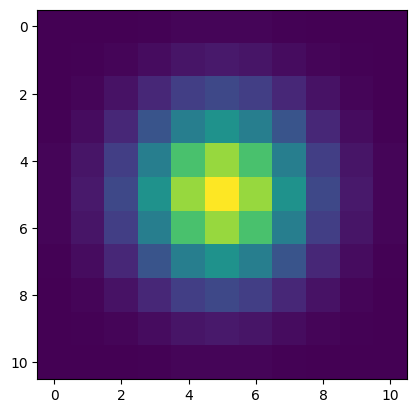

In [25]:
plt.imshow(k2)
plt.show()

In [7]:
kernel = cv2.getGaussianKernel(11, 1.718)

In [8]:
kernel

array([[0.003366  ],
       [0.01546162],
       [0.050612  ],
       [0.11806185],
       [0.19625615],
       [0.23248477],
       [0.19625615],
       [0.11806185],
       [0.050612  ],
       [0.01546162],
       [0.003366  ]])

In [13]:
type(kernel)

numpy.ndarray

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

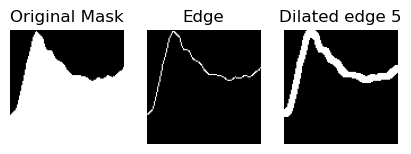

In [6]:
mask = cv2.imread("tgs_salt/1bd1c8c771Mask.png")
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(mask,100,200)
kernel = np.ones((5,5))
dilated_edge = cv2.dilate(edges, kernel, iterations=1)
# plt imshow 3 columns
plt.figure(figsize=(5,5))
plt.subplot(131),plt.imshow(mask,cmap = 'gray')
plt.title('Original Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Edge'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(133),plt.imshow(dilated_edge,cmap = 'gray')
plt.title('Dilated edge 5'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

In [2]:
sample = cv2.imread("tgs_salt/1bd1c8c771.png")
# Convert original to sample representation.
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)

# Convert sample to floating point and normalize to the range [0., 1.]
sample = sample.astype(np.float64)
sample = sample / 255.

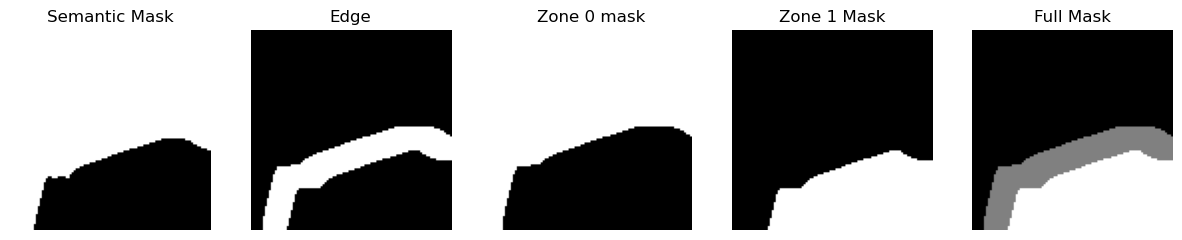

In [5]:
#show dilated_edge, semantic_mask, reduced_semantic_mask, reduced_inverted_mask
plt.figure(figsize=(15,15))

plt.subplot(151),plt.imshow(semantic_mask,cmap = 'gray')
plt.title('Semantic Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(152),plt.imshow(dilated_edge,cmap = 'gray')
plt.title('Edge'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(153),plt.imshow(zone0,cmap = 'gray')
plt.title('Zone 0 mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(154),plt.imshow(zone1,cmap = 'gray')
plt.title('Zone 1 Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(155),plt.imshow(fullmask,cmap = 'gray')
plt.title('Gerational Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

In [29]:
def create_Masks(semantic_mask):
    # Calculating Masks

    edges = cv2.Canny(semantic_mask,100,200)
    kernel = np.ones((11,11))
    dilated_edge = cv2.dilate(edges, kernel, iterations=1)
    inv_edge     = cv2.bitwise_not(dilated_edge)

    # Inverting the mask 
    mask_inverted = cv2.bitwise_not(semantic_mask)

    # Normalize to the range [0., 1.]
    semantic_mask = semantic_mask.astype(np.float64) / 255.
    mask_inverted = mask_inverted.astype(np.float64) / 255.
    dilated_edge = dilated_edge.astype(np.float64) / 255.
    inv_edge     = inv_edge.astype(np.float64) / 255.

    zone0 = semantic_mask * inv_edge
    zone1 = mask_inverted * inv_edge

    fullmask = zone0*1 + dilated_edge*2 +zone1*3

    return dilated_edge, zone0, zone1, fullmask


def sampleBreak(sample, mask):
    dilated_edge, zone0, zone1, fullmask = create_Masks(mask)
    sample_dilated_edge = sample * dilated_edge
    sample_reduced  = sample * zone0
    sample_inverted = sample * zone1
    return sample_dilated_edge, sample_reduced, sample_inverted

# Sample x mask

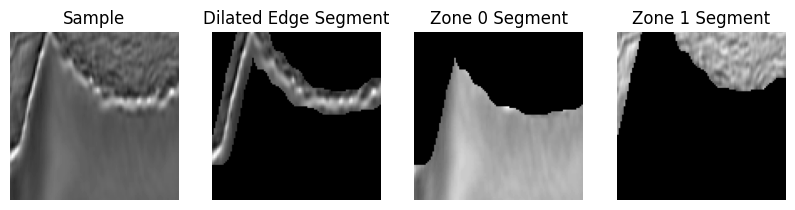

In [34]:
# show sample, dilated_edge_sample, reduced_sample, inverted_sample
plt.figure(figsize=(10,10))
plt.subplot(141),plt.imshow(sample,cmap = 'gray')
plt.title('Sample'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(142),plt.imshow(sample_dilated_edge,cmap = 'gray')
plt.title('Dilated Edge Segment'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(143),plt.imshow(sample_reduced,cmap = 'gray')
plt.title('Zone 0 Segment'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(144),plt.imshow(sample_inverted,cmap = 'gray')
plt.title('Zone 1 Segment'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

In [3]:
sample_path="tgs_salt/1bd1c8c771.png"
sample_semantic_mask_path="tgs_salt/1bd1c8c771Mask.png"
generat_mask_path="tgs_salt/0bdd44d530Mask.png" 

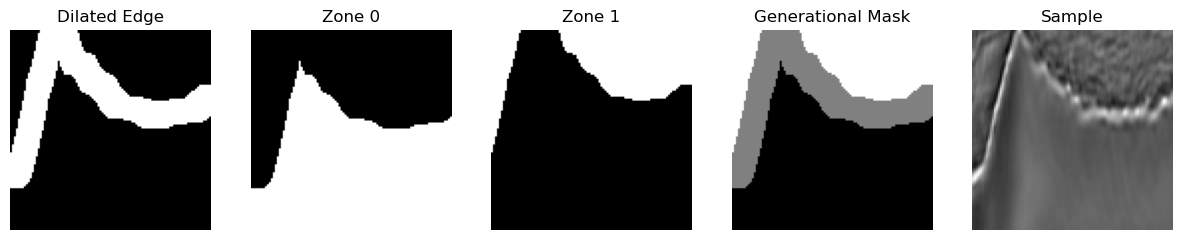

In [14]:
dilated_edge, zone0, zone1, generat_mask = create_Masks(sample_semantic_mask_path)
#show images
#show images
plt.figure(figsize=(15,15))
plt.subplot(151),plt.imshow(dilated_edge,cmap = 'gray')
plt.title('Dilated Edge'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(152),plt.imshow(zone0,cmap = 'gray')
plt.title('Zone 0'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(153),plt.imshow(zone1,cmap = 'gray')
plt.title('Zone 1'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(154),plt.imshow(generat_mask,cmap = 'gray')
plt.title('Generational Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(155),plt.imshow(sample,cmap = 'gray')
plt.title('Sample'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

# Load images and show

In [17]:
#load launch.json
#load launch.json
import json
with open('launch.json') as json_file:
    data = json.load(json_file)

JSONDecodeError: Expecting property name enclosed in double quotes: line 2 column 5 (char 6)

In [1]:
def load(path):
    sample = cv2.imread(path)
    sample = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)
    return sample

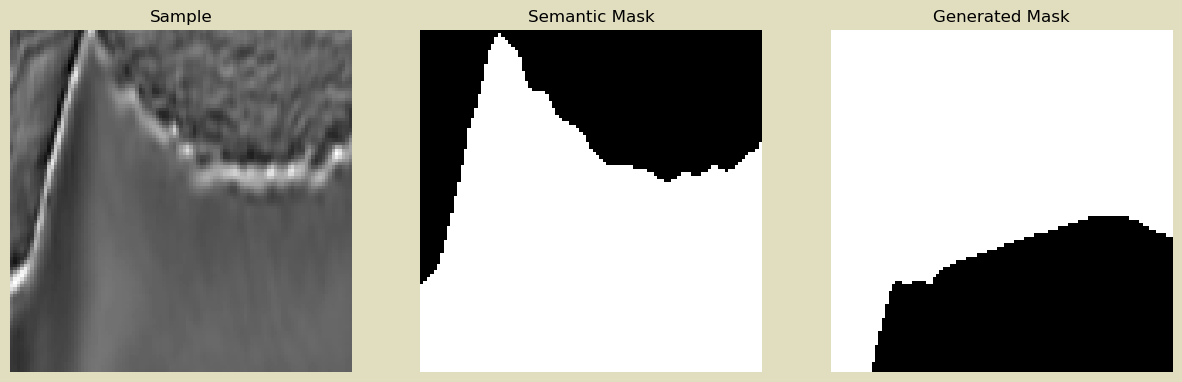

In [5]:
sample = load(sample_path)
sample_semantic_mask = load(sample_semantic_mask_path)
generat_mask = load(generat_mask_path)

plt.figure(figsize=(15,15),facecolor="#e1ddbf")
plt.subplot(131),plt.imshow(sample,cmap = 'gray')
plt.title('Sample'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(132),plt.imshow(sample_semantic_mask,cmap = 'gray')
plt.title('Semantic Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(133),plt.imshow(generat_mask,cmap = 'gray')
plt.title('Generated Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

In [18]:
sample_dilated_edge, sample_reduced, sample_inverted = sampleBreak(sample, sample_semantic_mask)
#show images

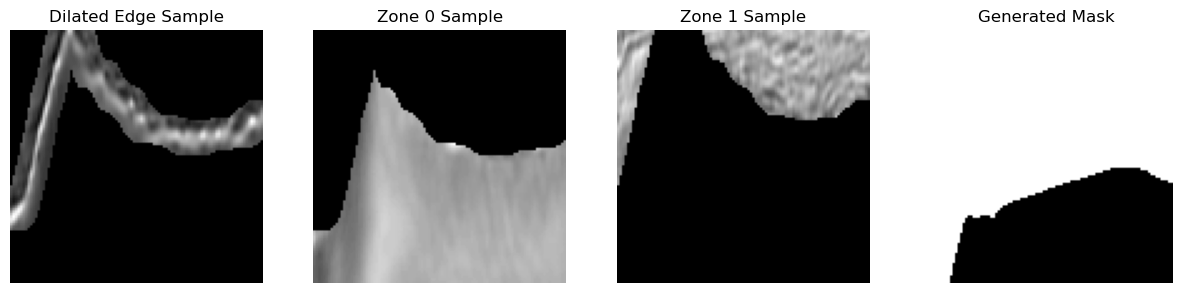

In [26]:
plt.figure(figsize=(15,15))
plt.subplot(141),plt.imshow(sample_dilated_edge,cmap = 'gray')
plt.title('Dilated Edge Sample'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(142),plt.imshow(sample_reduced,cmap = 'gray')
plt.title('Zone 0 Sample'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(143),plt.imshow(sample_inverted,cmap = 'gray')
plt.title('Zone 1 Sample'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(144),plt.imshow(generat_mask,cmap = 'gray')
plt.title('Generated Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()


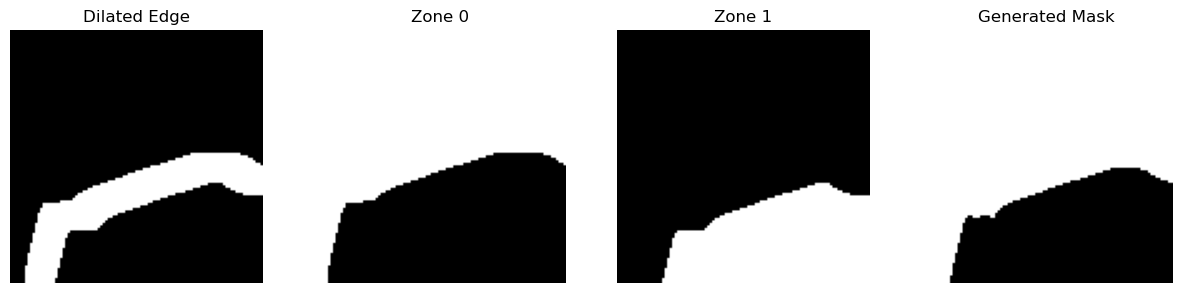

In [31]:
dilated_edge, zone0, zone1, fullmask = create_Masks(generat_mask)
#show images
plt.figure(figsize=(15,15))
plt.subplot(141),plt.imshow(dilated_edge,cmap = 'gray')
plt.title('Dilated Edge'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(142),plt.imshow(zone0,cmap = 'gray')
plt.title('Zone 0'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(143),plt.imshow(zone1,cmap = 'gray')
plt.title('Zone 1'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(144),plt.imshow(generat_mask,cmap = 'gray')
plt.title('Generated Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()
